## Set up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# load summary metrics file
summary_df = pd.read_csv('../data/derived/performance/kmeans_summary.csv')

# sort file
summary_df.sort_values(['vector_name', 'metric_name', 'hyperparameter_value'], inplace=True)

# preview dataframe
summary_df.sample(5)

,vector_name,hyperparameter_name,hyperparameter_value,metric_name,metric_value
19,tfidf,clusters,6,calinski_harabasz,24.985724
69,count,clusters,7,completeness,0.089497
63,count,clusters,3,calinski_harabasz,115.542566
51,tfidf,clusters,10,calinski_harabasz,19.684725
2,count,clusters,8,adjusted_rand,0.078993


## Visualize performance with line plots

In [3]:
def plot_performance(df,
                     row_order_list = ['count','tfidf'],
                     col_order_list = ['completeness', 'homogeneity', 'adjusted_rand', 'calinski_harabasz']):
    
    # sort dataframe by hyperparameter value
    
    
    # set style
    sns.set_style("whitegrid")

    # initialize facet grid
    g = sns.FacetGrid(df,
                      row = 'vector_name',
                      row_order = row_order_list,
                      col = 'metric_name',
                      col_order = col_order_list,
                      size = 2, aspect = 1.5,
                      hue = 'vector_name',
                      sharey='col')

    # add scatter plot
    g = g.map(plt.scatter, 'hyperparameter_value', 'metric_value')

    # add y-axis labels
    for row in range(len(row_order_list)):
        # add titles to rows
        g.axes[row, 0].set_ylabel(f'{row_order_list[row]}')
        for col in range(len(col_order_list)):
            # add titles to columns
            g.axes[0, col].set_title(f'{col_order_list[col]}')
            # remove titles from columns past first row
            if row != 0:
                g.axes[row, col].set_title('')
    
    # save figure
    g.tight_layout()
    g.savefig(f'../data/derived/visualizations/kmeans.png')
    
    return None

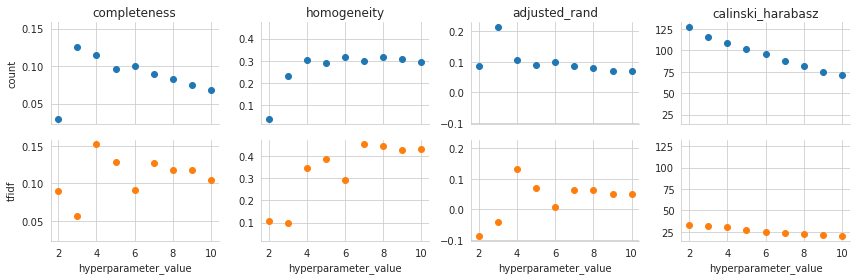

In [4]:
plot_performance(summary_df)